In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data loading and exploring


In [14]:
# data converted to csv as while loading in excel taking too much time
df_es = pd.read_csv('/content/ES.csv')
df_fr = pd.read_csv('/content/FR.csv')
df_uk = pd.read_csv('/content/UK.csv')
df_de = pd.read_csv('/content/DE.csv')
df_us = pd.read_csv('/content/US.csv')

print(df_es.head(2))
print(df_fr.head(2))
print(df_uk.head(2))
print(df_de.head(2))
print(df_us.head(2))

/tmp/ipython-input-1875686927.py:3: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipython-input-1875686927.py:4: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipython-input-1875686927.py:5: DtypeWarning:

Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipython-input-1875686927.py:6: DtypeWarning:

Columns (13,26,27) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipython-input-1875686927.py:7: DtypeWarning:

Columns (15,29,30) have mixed types. Specify dtype option on import or set low_memory=False.



                  date/time  settlement id        type order id  \
0  31 dic 2020 23:49:42 UTC    14651800242  Adjustment      NaN   
1  31 dic 2020 23:50:34 UTC    14651800242  Adjustment      NaN   

                     sku                                        description  \
0  PAN-EU-MM-PhoRep-1056  Reembolso de inventario - extraviado en el alm...   
1  PAN-EU-MM-PhoRep-1056  Reembolso de inventario - extraviado en el alm...   

   quantity marketplace Country fulfilment  ... gift wrap credits  \
0       1.0         NaN      ES        NaN  ...               0.0   
1       1.0         NaN      ES        NaN  ...               0.0   

  giftwrap credits tax promotional rebates promotional rebates tax  \
0                  0.0                 0.0                     0.0   
1                  0.0                 0.0                     0.0   

   marketplace withheld tax  selling fees  fba fees  other transaction fees  \
0                       0.0           0.0       0.0           

In [15]:
print(df_es.shape)
print(df_fr.shape)
print(df_uk.shape)
print(df_de.shape)
print(df_us.shape)

(266201, 28)
(531454, 28)
(433052, 28)
(781300, 28)
(706797, 31)


In [16]:
print(df_es.info())
print(df_fr.info())
print(df_uk.info())
print(df_de.info())
print(df_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266201 entries, 0 to 266200
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   date/time                 266201 non-null  object 
 1   settlement id             266201 non-null  int64  
 2   type                      266201 non-null  object 
 3   order id                  261820 non-null  object 
 4   sku                       263626 non-null  object 
 5   description               266186 non-null  object 
 6   quantity                  263384 non-null  float64
 7   marketplace               258443 non-null  object 
 8   Country                   266201 non-null  object 
 9   fulfilment                256012 non-null  object 
 10  order city                256010 non-null  object 
 11  order state               250154 non-null  object 
 12  order postal              256008 non-null  object 
 13  tax collection model      54 non-null      o

In [17]:
print(df_es.describe())
print(df_fr.describe())
print(df_uk.describe())
print(df_de.describe())
print(df_us.describe())

       settlement id       quantity  product sales  product sales tax  \
count   2.662010e+05  263384.000000  266201.000000      266201.000000   
mean    1.791711e+10       4.931841       7.820112           1.482195   
std     1.834035e+09       3.164997       9.600997           1.898482   
min     1.465180e+10       0.000000    -141.240000         -29.640000   
25%     1.642754e+10       2.000000       6.600000           1.390000   
50%     1.793293e+10       5.000000       7.430000           1.560000   
75%     1.929530e+10       8.000000      10.730000           2.080000   
max     2.134899e+10      10.000000     236.900000          46.800000   

       postage credits  shipping credits tax  gift wrap credits  \
count    266201.000000         266201.000000      266201.000000   
mean          0.197646              0.036783           0.000359   
std           0.864099              0.167286           0.035671   
min         -13.580000             -2.520000          -3.300000   
25%    

In [18]:
print(df_es.isnull().sum())
print(df_fr.isnull().sum())
print(df_uk.isnull().sum())
print(df_de.isnull().sum())
print(df_us.isnull().sum())

date/time                        0
settlement id                    0
type                             0
order id                      4381
sku                           2575
description                     15
quantity                      2817
marketplace                   7758
Country                          0
fulfilment                   10189
order city                   10191
order state                  16047
order postal                 10193
tax collection model        266147
product sales                    0
product sales tax                0
postage credits                  0
shipping credits tax             0
gift wrap credits                0
giftwrap credits tax             0
promotional rebates              0
promotional rebates tax          0
marketplace withheld tax         0
selling fees                     0
fba fees                         0
other transaction fees           0
other                            0
total                            0
dtype: int64
date/ti

In [19]:
print(df_es.duplicated().sum())
print(df_fr.duplicated().sum())
print(df_uk.duplicated().sum())
print(df_de.duplicated().sum())
print(df_us.duplicated().sum())

719
490
2976
4353
5690


In [23]:
print()

## Data cleaning and preprocessing


In [22]:
def clean_and_preprocess(df, country_code, exchange_rates):
    if country_code in ['ES', 'FR', 'UK']:
        df['date/time'] = pd.to_datetime(df['date/time'], format='%d %b %Y %H:%M:%S UTC', errors='coerce')
    elif country_code == 'DE':
        df['date/time'] = pd.to_datetime(df['date/time'], format='%d.%m.%Y %H:%M:%S UTC', errors='coerce')
    elif country_code == 'US':
        df['date/time'] = pd.to_datetime(df['date/time'], format='%b %d, %Y %I:%M:%S %p %Z', errors='coerce')

    df = df.dropna(subset=['total'])
    df = df.drop_duplicates()

    df['country'] = country_code
    df['total'] = pd.to_numeric(df['total'], errors='coerce')

    if country_code in exchange_rates:
        df['total_eur'] = df['total'] * exchange_rates[country_code]
    else:
        df['total_eur'] = df['total']

    return df


exchange_rates = {
    'UK': 1.18,
    'US': 0.93,
    'DE': 1.00,
    'FR': 1.00,
    'ES': 1.00
}

df_es_cleaned = clean_and_preprocess(df_es.copy(), 'ES', exchange_rates)
df_fr_cleaned = clean_and_preprocess(df_fr.copy(), 'FR', exchange_rates)
df_uk_cleaned = clean_and_preprocess(df_uk.copy(), 'UK', exchange_rates)
df_de_cleaned = clean_and_preprocess(df_de.copy(), 'DE', exchange_rates)
df_us_cleaned = clean_and_preprocess(df_us.copy(), 'US', exchange_rates)

print("Done cleaning and prepping all datasets.")


Done cleaning and prepping all datasets.


## Combine data



In [3]:
dataframes_to_combine = [df_de_cleaned, df_es_cleaned, df_fr_cleaned, df_uk_cleaned, df_us_cleaned]
df_combined = pd.concat(dataframes_to_combine, ignore_index=True)

display(df_combined.head())
print(df_combined.shape)

,date/time,settlement id,type,order id,sku,description,quantity,marketplace,Country,fulfilment,...,selling fees,fba fees,other transaction fees,other,total,country,total_eur,other transaction fees.1,other.1,total.1
0,2020-12-31 23:54:41,14668686782,Refund,305-3488972-4981168,PAN-EU-App-PhoRep-1151 Child2,MMOBIEL Akku kompatibel mit iPhone 4S Li-Ion B...,9.0,amazon.de,DE,Amazon,...,1.68,0.0,0.0,0.0,-12.31,DE,-12.31,NaN,NaN,NaN
1,2021-01-01 00:25:44,14668686782,Adjustment,305-3760164-5117930,PAN-EU-MM-Tool-1017,Versand durch Amazon Erstattung für Lagerbesta...,3.0,NaN,DE,NaN,...,0.00,0.0,0.0,6.46,6.46,DE,6.46,NaN,NaN,NaN
2,2021-01-01 00:26:05,14668686782,Adjustment,302-2179035-0298738,PAN-EU-Sam-PhoRep-1215,Versand durch Amazon Erstattung für Lagerbesta...,7.0,NaN,DE,NaN,...,0.00,0.0,0.0,6.57,6.57,DE,6.57,NaN,NaN,NaN
3,2021-01-01 01:02:31,14668686782,Adjustment,NaN,PAN-EU-App-PhoRep-1008,Versand durch Amazon Erstattung für Lagerbesta...,3.0,NaN,DE,NaN,...,0.00,0.0,0.0,13.95,13.95,DE,13.95,NaN,NaN,NaN
4,2021-01-01 02:38:31,14668686782,Adjustment,NaN,PAN-EU-Sam-PhoRep-1311 Child1,Versand durch Amazon Erstattung für Lagerbesta...,4.0,NaN,DE,NaN,...,0.00,0.0,0.0,7.4,7.40,DE,7.40,NaN,NaN,NaN


(2697990, 33)


## Data analysis and reporting

### Subtask:
Perform data analysis to determine sales by country and region, analyze trends over time, and investigate refunds.


**Reasoning**:
Perform the data analysis steps requested in the subtask: calculate total sales by country and type, group by month for time trend analysis, and calculate total refund amount by country.



In [11]:

def summarize_total(df, group_col, value_col='total_eur', filter_cond=None):
    if filter_cond is not None:
        df = df.query(filter_cond)
    summary = df.groupby(group_col)[value_col].sum().reset_index()
    return summary

df_combined['month'] = df_combined['date/time'].dt.to_period('M').astype(str)

sales_by_country = summarize_total(df_combined, 'country')
sales_by_type = summarize_total(df_combined, 'type')
monthly_sales = summarize_total(df_combined, 'month')
refunds_by_country = summarize_total(df_combined, 'country', filter_cond="type == 'Refund'")

print("Total Sales by Country:")
print(sales_by_country)

print("\nTotal Sales by Transaction Type:")
print(sales_by_type)

print("\nMonthly Sales Trends:")
print(monthly_sales)

print("\nTotal Refund Amount by Country:")
print(refunds_by_country)


Total Sales by Country:
  country     total_eur
0      DE  4.034200e+06
1      ES  1.267039e+06
2      FR  2.751929e+06
3      UK  1.470252e+06
4      US -2.006607e+06

Total Sales by Transaction Type:
                        type     total_eur
0     A-to-z Guarantee Claim -2.421000e+01
1                 Adjustment  2.265963e+05
2          Chargeback Refund -3.799917e+02
3                   Deal Fee  0.000000e+00
4          Delivery Services -1.185900e+01
5    FBA Customer Return Fee -7.360404e+02
6          FBA Inventory Fee -1.025953e+05
7             Fee Adjustment  3.988118e+03
8               Liquidations  1.514827e+03
9   Liquidations Adjustments -7.296180e+01
10                     Order  1.025627e+07
11         Order_Retrocharge  3.542949e+03
12                    Refund -1.537640e+06
13        Refund_Retrocharge -8.101050e+02
14               Service Fee -1.332817e+06
15         Shipping Services -5.990000e+00

Monthly Sales Trends:
      month     total_eur
0   2020-12 -1.231

## Visualization



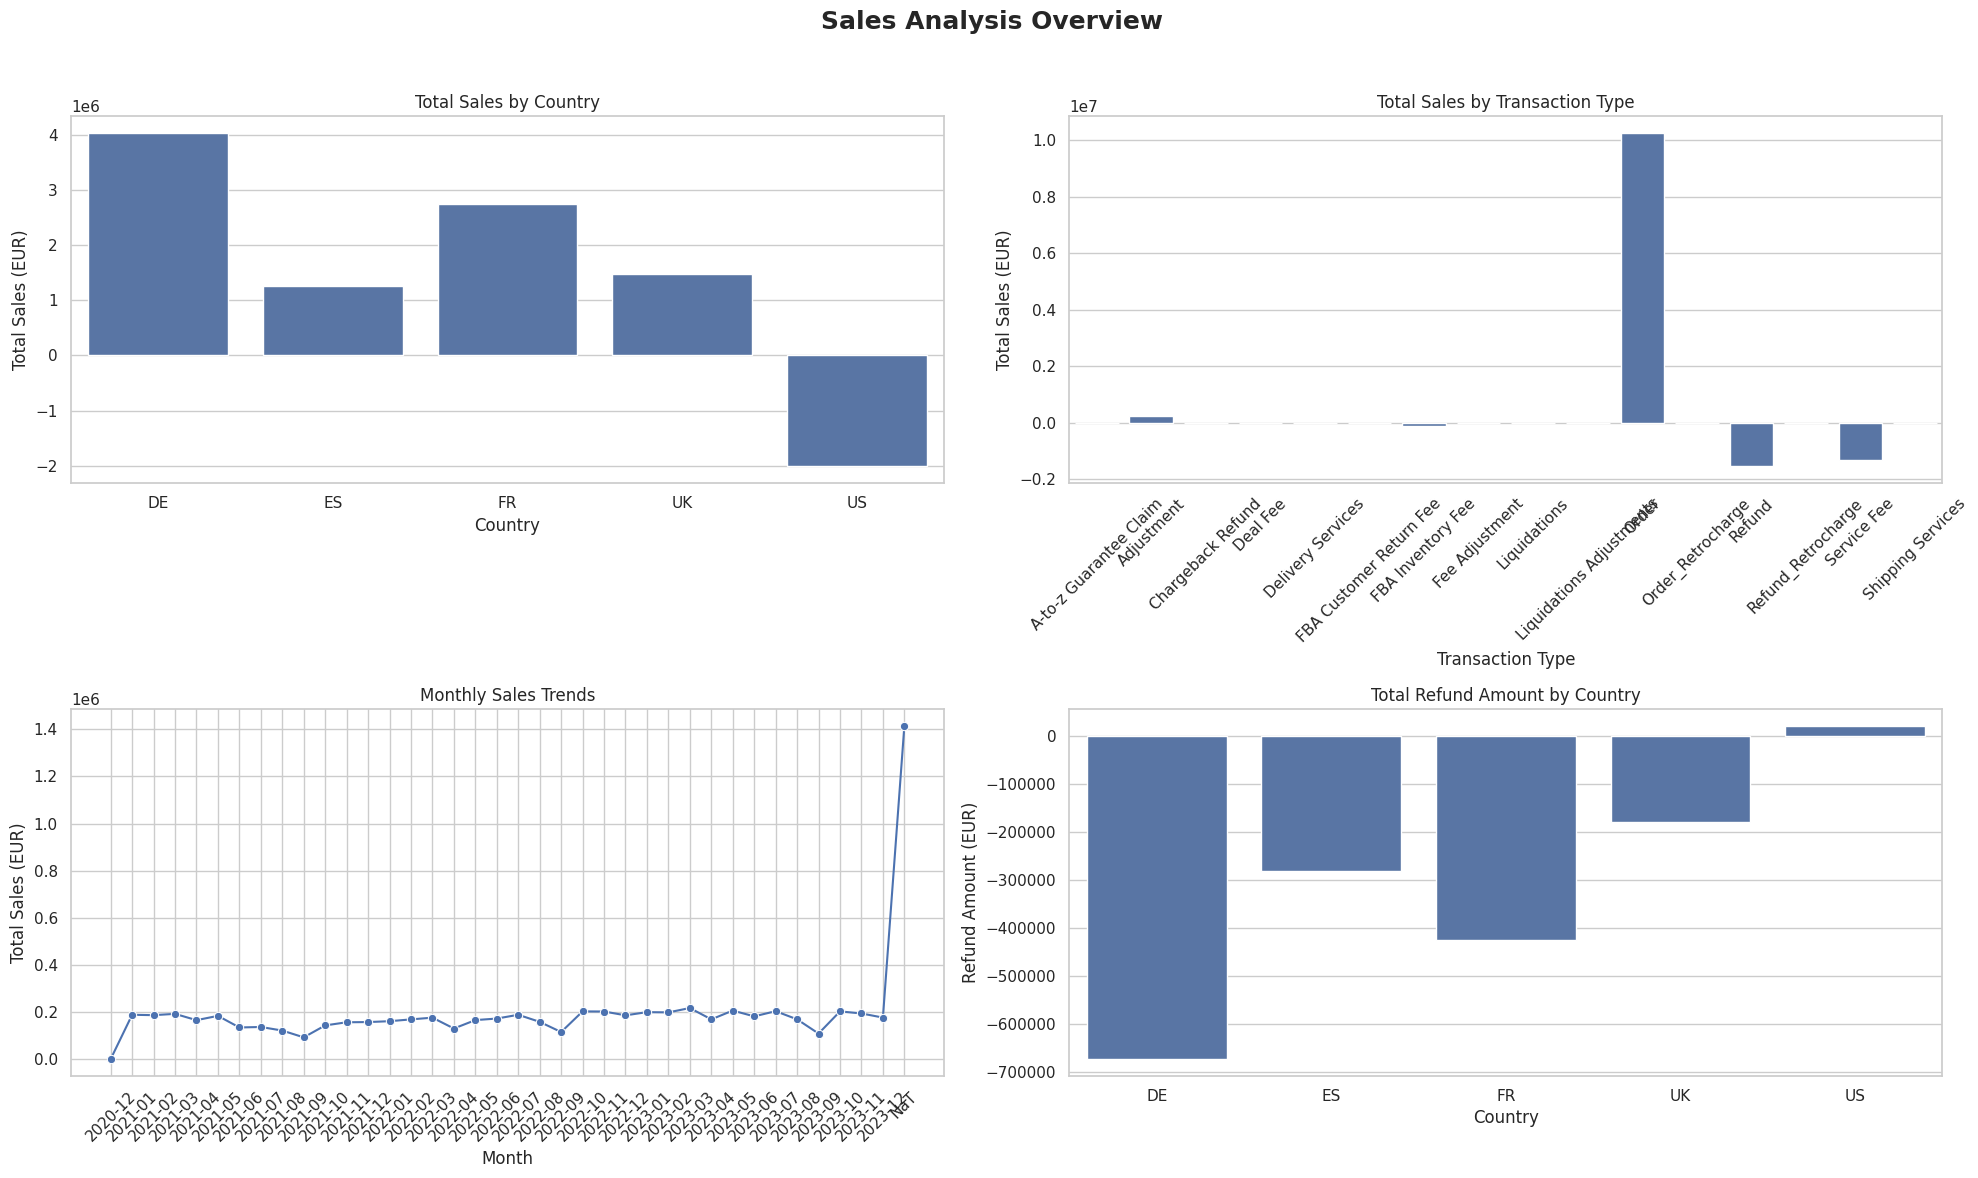

In [26]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Sales Analysis Overview', fontsize=18, fontweight='bold')

# Chart 1: Total Sales by Country
sns.barplot(x='country', y='total_eur', data=sales_by_country, ax=axs[0, 0])
axs[0, 0].set_title('Total Sales by Country')
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Total Sales (EUR)')

# Chart 2: Total Sales by Transaction Type
sns.barplot(x='type', y='total_eur', data=sales_by_type, ax=axs[0, 1])
axs[0, 1].set_title('Total Sales by Transaction Type')
axs[0, 1].set_xlabel('Transaction Type')
axs[0, 1].set_ylabel('Total Sales (EUR)')
axs[0, 1].tick_params(axis='x', rotation=45)

# Chart 3: Monthly Sales Trends
sns.lineplot(x='month', y='total_eur', data=monthly_sales, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Monthly Sales Trends')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Total Sales (EUR)')
axs[1, 0].tick_params(axis='x', rotation=45)

# Chart 4: Total Refund Amount by Country
sns.barplot(x='country', y='total_eur', data=refunds_by_country, ax=axs[1, 1])
axs[1, 1].set_title('Total Refund Amount by Country')
axs[1, 1].set_xlabel('Country')
axs[1, 1].set_ylabel('Refund Amount (EUR)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [9]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        "Total Sales by Country",
        "Total Sales by Transaction Type",
        "Monthly Sales Trends",
        "Total Refund Amount by Country"
    ]
)

# Chart 1: Total Sales by Country
fig.add_trace(
    go.Bar(
        x=sales_by_country['country'],
        y=sales_by_country['total_eur'],
        name="Sales by Country",
        marker_color='royalblue'
    ),
    row=1, col=1
)

# Chart 2: Total Sales by Transaction Type
fig.add_trace(
    go.Bar(
        x=sales_by_type['type'],
        y=sales_by_type['total_eur'],
        name="Sales by Type",
        marker_color='seagreen'
    ),
    row=1, col=2
)

# Chart 3: Monthly Sales Trends
fig.add_trace(
    go.Scatter(
        x=monthly_sales['month'],
        y=monthly_sales['total_eur'],
        mode='lines+markers',
        name="Monthly Sales",
        line=dict(color='orange', width=3)
    ),
    row=2, col=1
)

# Chart 4: Total Refund Amount by Country
fig.add_trace(
    go.Bar(
        x=refunds_by_country['country'],
        y=refunds_by_country['total_eur'],
        name="Refunds by Country",
        marker_color='crimson'
    ),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    width=1200,
    title_text="Sales Analytics Dashboard",
    showlegend=False,
    template='plotly_white',
    margin=dict(t=80, b=50)
)

fig.show()


## Summary:

Data Analysis Key Findings

Germany tops the list in total sales (in Euros), while the US shows sales in the red.
'Order' transactions boost total sales the most, and 'Refund' transactions drag them down the most.
Sales change from month to month.
Germany has given back the most money in refunds (in Euros).

US has negative total sales and so many refunds.
